
# 4. Evaluación y elección de la mejor segmentación

Una gran empresa de comercio electrónico se está preparando para su mayor evento del año. La empresa es ambiciosa en sus objetivos y pretende lograr las mejores cifras de ventas hasta el momento, esperando un crecimiento significativo respecto al evento del año pasado. El presupuesto de marketing es el más alto que jamás haya existido. **Para que esas campañas sean más efectivas, es fundamental comprender a los clientes y elegir el mensaje adecuado para ellos**.

En tal situación, una segmentación de clientes bien realizada puede marcar la diferencia y ayudar a maximizar el ROI (retorno de la inversión) del marketing.

Al analizar los segmentos de clientes, el equipo de marketing puede definir cuidadosamente las estrategias para cada segmento.

¿Cómo se debe decidir el número de segmentos? ¿Cómo evaluamos la robustez de los segmentos? 

 Como analista, también querrá explorar técnicas alternativas de ML para la agrupación que puedan ser más adecuadas para la naturaleza de los datos. ¿Qué pasa si la mayoría de las características son características categóricas?

En el capítulo anterior, presentamos el concepto de agrupamiento y lo practicamos usando el agrupamiento de k-means, un enfoque simple y poderoso para el agrupamiento que divide los puntos de datos en un número predeterminado de conglomerados. 

Creamos una cantidad predeterminada de clústeres, asumiendo que teníamos la cantidad correcta de clústeres con nosotros, ya sea por intuición o por restricciones comerciales. Además, para evaluar los clústeres resultantes, utilizamos una perspectiva comercial.

 Para completar la comprensión de la agrupación en clústeres y garantizar que tenemos la base de conocimientos adecuada para abordar cualquier problema relacionado con la segmentación, debemos poder responder las siguientes preguntas para cualquier ejercicio de segmentación:


- ¿Cómo elegimos el número de clusters?
- ¿Cómo evaluamos los clusters estadísticamente/numéricamente?
- ¿Cuál es el mejor algoritmo de clustering para la tarea?

En este capítulo, entenderemos todas las consideraciones para hacer una elección. Comenzaremos respondiendo a la primera pregunta. 
- Para elegir el número correcto de clústeres, además de las consideraciones comerciales, veremos tres enfoques diferentes para llegar estadísticamente a un número. 

Se explorarán métodos que no esperan un a especificación previamente el número deseado de clústeres. Estas técnicas traerán sus propias compensaciones que debemos entender. 

Hasta ahora, solo hemos trabajado con datos que son bastante fáciles de manejar para k-means: variables continuas o variables binarias. En este capítulo, explicaremos cómo manejar datos que contienen variables **categóricas** con muchos valores posibles diferentes, utilizando los métodos de agrupación en clústeres k-mode y k-prototype.

Finalmente, conoceremos si un método de agrupamiento es mejor que otro. Para este propósito, queremos poder **modificar los hiperparámetros** de un algoritmo de modelado y ser capaz de decir si eso condujo a una agrupación mejor o peor, así como comparar los diferentes tipos de algoritmos entre sí.

# 4.1 Elección del número de clústeres
Mientras realizábamos la segmentación en el capítulo anterior, especificamos el número de clusters al algoritmo k-means. Sin embargo, en la práctica, normalmente no sabemos la cantidad de grupos que se esperan en los datos. Si bien un analista o equipo comercial puede tener cierta intuición, puede ser muy diferente de los grupos 'naturales' que están disponibles en los datos. 

Por ejemplo, una empresa puede tener la intuición de que generalmente hay tres tipos de clientes. Pero un análisis de los datos puede apuntar a cinco grupos distintos de clientes. Recuerde que las características que elegimos y la escala de esas características también juegan un papel importante en la definición de **similitud** entre los clientes.

En este capítulo, discutiremos tres enfoques. 
- Primero, aprenderemos sobre la inspección visual simple, que tiene las ventajas de ser fácil e intuitiva, pero depende en gran medida del juicio y la subjetividad individuales. 

- Luego aprenderemos sobre el método del codo con la suma de los errores al cuadrado, que es parcialmente cuantitativo pero aún se basa en el juicio individual. 

- También aprenderemos sobre el uso de la puntuación de la silueta, que elimina la subjetividad del juicio, pero no es una métrica muy intuitiva.

Hay un principio primordial que siempre debe tener en cuenta: las **medidas cuantitativas** solo le indican qué tan bien se ajusta esa cantidad de grupos a los datos. No le dicen cuán útiles son esos clústeres para los negocios. 

Discutimos en el capítulo anterior que, por lo general, son los equipos comerciales los que consumen y actúan sobre estos segmentos. Los clústeres, por muy buenos que sean estadísticamente, son inútiles si la empresa no los puede accionar (actionable). Hay dos formas en que los clústeres pueden resultar no procesables:

- Los clústeres no tienen sentido de negocio
- Son demasiados clusters

Los clústeres deben ser interpretables por la empresa para que sean procesables (actionable). Por ejemplo, para que las campañas de marketing sean más efectivas, debe comprender bien la naturaleza de los grupos y lo que le importa a cada grupo para que los mensajes se puedan ajustar en consecuencia. 

En cuanto a la cantidad de clústeres, no es práctico crear una estrategia de marketing diferencial o experiencia del cliente para 30 clústeres diferentes. A menudo, existe un límite superior para la cantidad de clústeres que es práctico para que una empresa actúe.

El uso de menos clusterss y menos variables a menudo puede conducir a clusters más fáciles de interpretar. En general, los datos del mundo real son bastante confusos y hay muchos juicios que hacer. Aprender acerca de estos métodos lo ayudará a saber qué tan buenos son sus clústeres mientras se asegura de que los métodos en sí están bien fundamentados. Pero tenga en cuenta que son sólo un factor. Desde una perspectiva cuantitativa, la diferencia entre elegir cuatro grupos y cinco puede ser pequeña y, en ese punto, debe estar preparado para usar su criterio para decidir qué es lo mejor.

 Comencemos empleando el **enfoque visual simple** para los clientes del centro comercial en el siguiente ejercicio.

# Ejercicio 4.01: Puesta en escena y visualización de datos

Examinaremos nuevamente el problema comercial delCapítulo 3, Aprendizaje no supervisado y segmentación de clientes. 

Un centro comercial desea rediseñar sus ofertas y comunicaciones de marketing existentes para **mejorar** las ventas en uno de sus mercados clave. 

La comprensión de sus clientes es fundamental para este objetivo, y para eso se necesita una buena segmentación de los clientes.
El objetivo de este ejercicio es cargar los datos y realizar una limpieza básica para que pueda usarlos convenientemente para otras tareas. Además, visualizará los datos para comprender mejor cómo se distribuyen los clientes en dos atributos clave: Income y Spend_score. Se usarán estos campos más adelante para realizar agrupamiento.

1. Importar las bibliotecas pandas, numpy, matplotlib y seaborn y cargar los datos de los clientes del centro comercial desde el archivo Mall_Customers.csv en un DataFrame (mall0) e imprimir los cinco registros principales con el siguiente código.

In [4]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2a/datasets/Mall_Customers.csv -O

mall0 = pd.read_csv("Mall_Customers.csv") 
mall0.head()

# Vemos que tenemos información como el género y la edad de los clientes, 
# junto con su ingreso anual estimado (Ingreso Anual (k$)). 
# También tenemos una spending score calculada por el centro comercial 
# (Spending Score (1-100)), un score basado en percentiles que denotan el alcance 
# de las compras que el cliente ha realizado en el centro comercial: 
# una puntuación más alta significa un mayor gasto (el que más gasta obtiene una puntuación de 100 ).


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  43953      0 --:--:-- --:--:-- --:--:-- 43953


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Cambie el nombre de las columnas 'Annual Income (k$)' y
'Spending Score (1-100)' a 'Income' y 'Spend_score' respectivamente. Imprima los primeros cinco registros del conjunto de datos para confirmar que se completó el cambio.

In [8]:
mall0.rename({'Annual Income (k$)':'Income',  'Spending Score (1-100)':'Spend_score'},
             axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Trace un diagrama de dispersión de los campos Income y Spend_score utilizando el siguiente código. Realizará la agrupación en clustering más adelante utilizando estas dos funciones como criterio.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


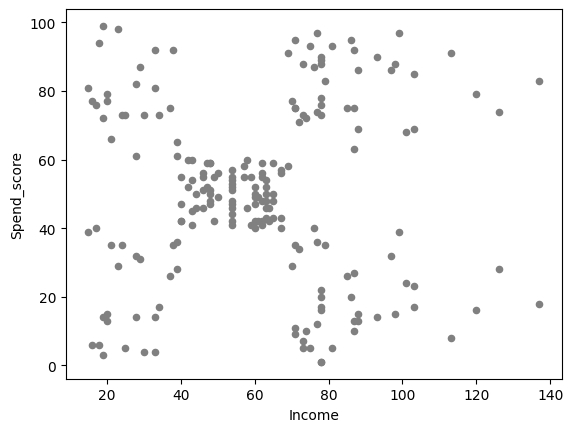

In [10]:
mall0.plot.scatter(x='Income', y='Spend_score', color='gray')

plt.show()

# La visualización de los datos proporciona una buena perspectiva de la 
# distribución y puede darnos una idea de los grupos naturales en los datos. 
# Estos conocimientos pueden mostrarnos los números que elegimos para 
# la actividad de agrupación.

# 4.2 Inspección **visual** simple para elegir el número óptimo de Clusters

Un método intuitivo y directo para elegir el número de grupos es realizar un agrupamiento con un rango de grupos e inspeccionar visualmente los resultados. Por lo general, al observar los datos, puede saber qué tan bien separados están los diferentes grupos.

Los clústeres son mejores cuando **están bien separados**, sin demasiada superposición y cuando capturan las partes más densamente pobladas del espacio de datos. 

En la figura del ejercicio anterior, el grupo en el centro del gráfico, con un puntaje de ingresos y gastos promedio, es un buen grupo compacto ya que los puntos están cerca uno del otro en un área densa. El grupo en la esquina inferior derecha, por otro lado, se extiende delgadamente en un área más grande. En un escenario ideal, solo tendríamos clústeres densos que no se superponen.

La elección del número de clústeres tiene un efecto significativo sobre cómo se asignan los clústeres. Muy pocos grupos a menudo darán lugar a plots que se ven como una solo clúster que abarca más de un espacio densamente poblado. 


Por otro lado, demasiados clústeres a menudo parecerán que están compitiendo por un solo espacio densamente poblado. Cuando se trata de más de dos dimensiones, podemos utilizar técnicas de **reducción de dimensionalidad** para permitir la evaluación visual. 


Este no es un método cuantitativo; sin embargo, como deja mucho a la subjetividad y al juicio individual, para muchos problemas simples, es una excelente manera de decidir cuántos clústeres usar.

# Ejercicio 4.02: Elección del número de Clusters en función de la inspección visual

El objetivo del ejercicio es perfeccionar aún más el enfoque de segmentación de clientes mediante la inspección visual para decidir el número óptimo de grupos.

Se probaran diferentes números de grupos (que van de dos a seis) y utilizarás la inspección visual para evaluar los resultados y elegir el número correcto de grupos.

1. Estandarizar las columnas Age, Income y Spend_score, usando StandardScaler de sklearn, después de copiar la información en un nuevo conjunto de datos llamado mall_scaled.

In [11]:
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform\
                             (mall_scaled[cols_to_scale])

2. Importe el módulo Kmeans del paquete sklearn. Crear una lista, 'cluster_cols' que almacene los nombres de los campos (Ingresos y Spend_score) y definir los colores y las formas que se usará para cada grupo (ya que visualizará hasta siete grupos en total, definir siete formas diferentes)

In [12]:
from sklearn.cluster import KMeans
cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

# Al trazar los clusters obtenidos, los elementos en los clusters estarán 
# representados por los símbolos en la lista en orden. 
# 'x' representará el primer clúster (Cluster 0). 
# Para el agrupamiento final con 7 grupos, 
# se utilizarán todas las formas de la lista y el grupo 6 se representará 
# con el marcador '2' (llamado 'tickup').

3. Luego, usando un bucle for, agrupar los datos usando un número diferente de grupos, que van de dos a siete, y visualizar las gráficas resultantes obtenidas en una subparcela. 

Usar un bucle for separado para trazar cada grupo en cada subplot, de modo que podamos usar diferentes formas para cada grupo. 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

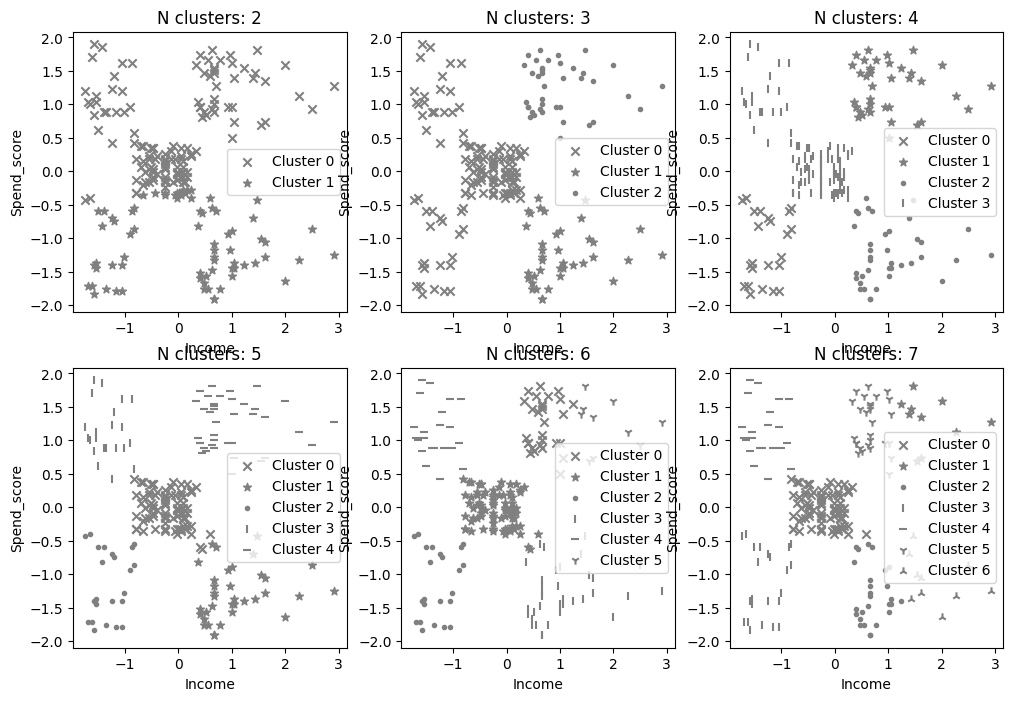

In [15]:
plt.figure(figsize=[12,8])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict\
                            (mall_scaled[cluster_cols])
    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score, \
                    marker=markers[clust], \
                    label="Cluster "+ str(clust), color='gray') 
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()
plt.show()

Al observar los gráficos resultantes, podemos ver que con muy pocos grupos (2, 3 o 4), terminamos con grupos que abarcan regiones dispersas entre regiones más densamente pobladas. 
Por ejemplo, con 3 clústeres, vemos que obtenemos un clúster enorme para clientes de bajos ingresos. Por otro lado, con demasiados (6 o 7), terminamos con grupos que bordean entre sí pero no parecen separados
por una región de escasez. 

Cinco grupos parecen capturar cosas muy bien con grupos que no se superponen y son bastante densos. **Cinco es, por lo tanto, el número "correcto" de grupos**. 

Esto está en línea con nuestra expectativa que creamos en el Ejercicio 4.01, Puesta en escena y visualización de datos. Este simple método visual es efectivo, pero tenga en cuenta que es completamente subjetivo.

# El método **Elbow** con suma de errores al cuadrado
A menudo, es difícil saber solo con la visualización cuántos grupos se deben usar para resolver un problema en particular. 

Diferentes personas pueden estar en desacuerdo sobre el número
de grupos a utilizar, y puede que no haya una respuesta clara y unánime. 

Con datos dimensionales más altos, hay un problema adicional: técnicas de reducción de dimensionalidad no son perfectos Intentan tomar toda la información en múltiples dimensiones y reducirlo a sólo dos. 

En algunos casos, esto puede funcionar bien, pero a medida que aumenta el número de dimensiones, los datos se vuelven más complejos y estos métodos visuales alcanzan rápidamente sus limitaciones. Cuando esto sucede, no es fácil determinar a través de una inspección visual cuál es el número correcto de clústeres que se debe usar. En estos casos, a menudo es mejor buscar una medida más cuantitativa. 

Una de esas medidas clásicas es buscar un elbow en un gráfico de la suma de los errores al cuadrado, también llamado Gráfico de inercia (Inertia Plot).

La suma de los errores al cuadrado (SSE) es la suma de los "errores" (la diferencia entre un punto de datos y el centroide de su grupo asignado) para todos los puntos de datos, al cuadrado. Otro término para esto es inercia. Cuanto más apretados sean los grupos, más cerca estarán los puntos constituyentes de sus respectivos grupos y menor será el SSE/inercia. La suma de los errores cuadráticos del modelo se puede calcular mediante la siguiente ecuación:

<h1><center>
$ ss = \sum_{k} \sum_{x_i \in k} \left( x_{i}-\mu_{k}\right)^2  $


Figura 4.5: Ecuación para calcular la suma de los errores cuadráticos de los puntos de datos en un conjunto de datos
</center><h1>

Aquí, $\mu_{k}$ es la ubicación del centroide del grupo $k$, y cada $x_i$ es un punto de datos asignado al grupo $k$. Cuando todas las entidades se tratan como un solo grupo, este valor de $SSE$ está en su máximo para el conjunto de datos. 
A medida que aumentamos $k$, deberíamos esperar que la suma de los errores al cuadrado disminuya, ya que hay más centroides. 

En el caso extremo, cuando cada punto es un cluster, el valor $SSE$/inercia es 0, ya que cada punto es el centroide de su propio cluster. En scikit-learn, utilizará el atributo 'inertia_' que está disponible después de ajustar un modelo. Por ejemplo, si 'modelo' es el nombre de la instancia de Kmeans que encaja en los datos, extraer e imprimir el $SSE$ es tan simple como el siguiente comando:

In [16]:
print(model.inertia_)

44.91118554999014


Esta intuición ayuda a identificar el número óptimo de clústeres. Cuando SSE/inercia se grafica en diferentes números de grupos, a menudo hay un Elbow en el gráfico, donde la ganancia en términos de reducción de errores parece disminuir para cada nuevo grupo. A continuación se muestra un gráfico de ejemplo en la Figura 4.6.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1JnysM16FxWcckkBa4VELSOcJnWc2HVqk' width="800" />
<figcaption>
Figura 4.6: SSE/inercia para diferentes valores de k, con un "Elbow" (punto de inflexión) en k=4</figcaption></center>
</figure>

# Ejercicio 4.03: Determinación del Número de Clusters Usando el Método Elbow
En este ejercicio, utilizará el método del elbow para identificar la cantidad óptima de clusters. El objetivo es mejorar el enfoque de segmentación de clientes del centro comercial mediante el uso de un método de principios para determinar la cantidad de grupos, de modo que todas las partes interesadas involucradas, incluidos los equipos comerciales, ganen más confianza en la solidez del enfoque y los grupos resultantes. 

Pruebe el rango de 2 a 10 para el número de grupos utilizando los datos de edad e ingresos.

1. En los datos de clientes del centro comercial escalados (mall_scaled), usando las columnas 'Income' y 'Spend_score', crear tres clústeres usando el algoritmo KMeans:

In [25]:
K= 3
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

2. Una vez que se ajusta el modelo, el SSE/inercia está disponible muy convenientemente en el atributo 'inertia_' del objeto del modelo. Imprima el SSE/inercia para el modelo con 3 grupos usando el siguiente código:

In [26]:
print(model.inertia_)
# Observa que la inercia es 157,70. 
# Tenga en cuenta que este número por sí solo no significa mucho para nosotros. 
# Estamos más interesados ​​en cómo cambia este número con el número de grupos.

157.7040081503594


3. Ajuste varios modelos de KMeans con un número de grupos que varíe de 2 a 10 y almacene los valores de inercia para los diferentes modelos en una lista.

In [34]:
X = mall_scaled[cluster_cols]
inertia_scores = []
for K in range(2,11):
  inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
  inertia_scores.append(inertia)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

4. Crear el diagrama SSE/inercia como un diagrama de líneas.

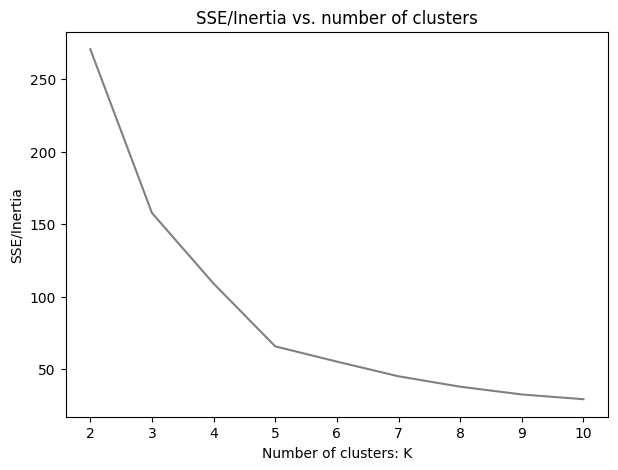

In [35]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray') 
plt.title("SSE/Inertia vs. number of clusters") 
plt.xlabel("Number of clusters: K") 
plt.ylabel('SSE/Inertia')
plt.show()

In [ ]:
# Al observar el gráfico anterior, notamos que hay un codo en el gráfico 
# en K=5. Entonces, tomamos cinco como el número óptimo de grupos, el mejor valor
# de K para el algoritmo KMeans. 

# Antes de eso, cada grupo adicional nos brinda grandes ganancias al reducir 
# la suma de los errores al cuadrado. Más allá de cinco, parece que obtenemos 
# rendimientos extremadamente bajos.

Ahora emplearemos ambos enfoques para resolver un problema comercial utilizando la segmentación de clientes.

# Actividad 4.01: Optimización de la campaña de marketing de una marca de ropa de lujo utilizando Clustering

En una empresa que vende ropa de lujo el equipo de ventas ha recopilado datos sobre la edad del cliente, los ingresos, su gasto anual en el negocio y la cantidad de días desde su última compra. 

La empresa quiere iniciar campañas de marketing dirigidas, pero no sabe cuántos tipos diferentes de clientes tiene. Si se entendieran la cantidad de segmentos diferentes, ayudaría a diseñar mejor la campaña al ayudar a definir los canales a usar, los mensajes a emplear y más.
El objetivo es realizar una segmentación de clientes para la empresa lo que les ayudará a optimizar sus campañas. Para que su enfoque sea sólido y más confiable para el negocio, debe llegar a la cantidad correcta de segmentos utilizando el enfoque de visualización y el método de Elbow con la suma de los errores al cuadrado. 

1. Importar las bibliotecas requeridas para el manejo y trazado de DataFrame (pandas, numpy, matplotlib). Leer los datos del archivo 'Clothing_Customers.csv' en un DataFrame e imprimir las 5 filas superiores para comprenderlo mejor.

2. Estandarizar todas las columnas de los datos. Utilizar las cuatro columnas para la segmentación.

3. Visualizar los datos para comprenderlos bien. Ya que está tratando con cuatro dimensiones, use PCA para reducir a dos dimensiones antes de trazar. El gráfico resultante debe ser el siguiente.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1CtjZbN5zpiphknI50ju7lcwgvoTargSN' width="800" />
<figcaption>Figura 4.8: Diagrama de dispersión de los datos de dimensionalidad reducida</figcaption></center>
</figure>



4. Visualice el clustering con dos a siete grupos. Debería obtener la siguiente gráfica.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1lhrPBTVtUAx1hHHv585hi0dIjBmbgIkS' width="800" />
<figcaption>
Figura 4.9: Clusterings resultantes para un número diferente de Clusterings especificados</figcaption></center>
</figure>




Selección de clusters mediante el método del Elbow: crear un gráfico de la suma de los errores al cuadrado y busque un Elbow. Varíe la cantidad de grupos de 2 a 11. Debería obtener la siguiente gráfica.

Figure 4.10: SSE plot for different values of k


5. ¿Ambos métodos coinciden en el número óptimo de ebería obtener la siguiente gráfica.? En cuanto a los resultados de ambos, y en función de su comprensión de negocio, ¿cuál es la cantidad de clústeres que elegiría? Explique su decisión.